Load packages

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
import seaborn as sns

 Load dataset

In [2]:
df=pd.read_csv('creditcard.csv')
df

Time        V1        V2        V3        V4        V5        V6  \
0         0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1         0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2         1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3         1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4         2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...     ...       ...       ...       ...       ...       ...       ...   
7968  10980  1.284388 -0.013181  0.646174  0.198985 -0.568675 -0.526121   
7969  10981  1.190428 -0.122329  0.954945  0.267101 -0.971026 -0.652279   
7970  10981 -0.725175  0.298202  1.824761 -2.587170  0.283605 -0.016617   
7971  10981  1.226153 -0.129645  0.735197  0.142752 -0.703245 -0.349641   
7972  10981  1.145381 -0.059349  0.968088  0.267891 -0.822582 -0.597727   

            V7        V8        V9  ...       V21       V22       V23  \
0     0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474   
1    -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288   
2     0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412   
3     0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321   
4     0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458   
...        ...       ...       ...  ...       ...       ...       ...   
7968 -0.448235 -0.167709  1.773223  ... -0.101868 -0.030298 -0.081412   
7969 -0.612992 -0.003909  1.633117  ... -0.015001  0.127027  0.012079   
7970  0.153659  0.045084 -0.197611  ... -0.017097 -0.070535 -0.442861   
7971 -0.612641  0.020507  1.648986  ... -0.047936  0.040196 -0.057391   
7972 -0.450197 -0.119747  1.338188  ...       NaN       NaN       NaN   

           V24       V25       V26       V27       V28  Amount  Class  
0     0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62    0.0  
1    -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69    0.0  
2    -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66    0.0  
3    -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50    0.0  
4     0.141267 -0.206010  0.502292  0.219422  0.215153   69.99    0.0  
...        ...       ...       ...       ...       ...     ...    ...  
7968 -0.123281  0.278808  1.064001 -0.090181  0.000481   15.95    0.0  
7969  0.534409  0.112179  1.004483 -0.100188 -0.004774   14.95    0.0  
7970 -0.895837  0.624743 -0.510601 -0.031142  0.025564   12.95    0.0  
7971 -0.012386  0.187685  1.037786 -0.100081 -0.009869   15.95    0.0  
7972       NaN       NaN       NaN       NaN       NaN     NaN    NaN  

[7973 rows x 31 columns]

In [4]:
class_distribution = df['Class'].value_counts()
print(class_distribution)

0.0    7947
1.0      25
Name: Class, dtype: int64


# X contains the feature columns, and y contains the target column

In [3]:
X = df.drop(columns=['Class'])
y = df['Class']

In [21]:
if y.isnull().any():
    # Handle missing values in the target variable (replace with mean, median, or other strategies)
    imputer_target = SimpleImputer(strategy='mean')
    y = imputer_target.fit_transform(y.values.reshape(-1, 1)).flatten()


In [36]:
if y.dtype == 'float64':
    # Convert continuous values to binary (consider a threshold)
    threshold = 0.5
    y = (y > threshold).astype(int)

# Split the data into training and testing sets

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess and normalize the data

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle missing values

In [39]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


# Handle class imbalance using oversampling

In [40]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


# Choose a classification algorithm

In [41]:
model = LogisticRegression(random_state=42)

# Train the model

In [42]:
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=42)

# Make predictions on the test set

In [43]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# Evaluate the model

In [44]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Mean Absolute Error: 0.0012539184952978057
Mean Squared Error: 0.0012539184952978057


# Confusion Matrix

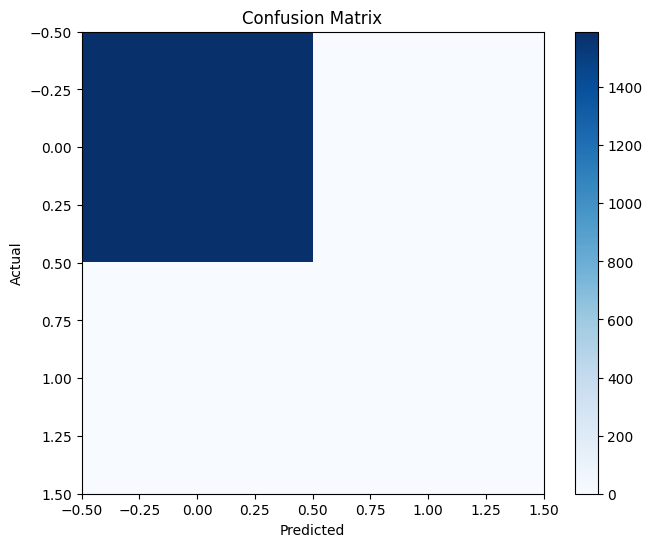

In [45]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve

In [46]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

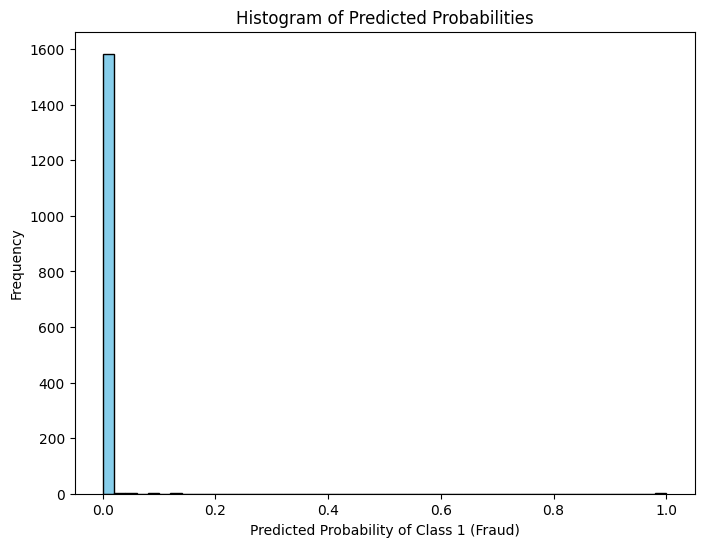

In [47]:
plt.figure(figsize=(8, 6))
plt.hist(model.predict_proba(X_test)[:, 1], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability of Class 1 (Fraud)')
plt.ylabel('Frequency')
plt.show()

In [50]:
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
average_precision = average_precision_score(y_test, model.predict_proba(X_test)[:, 1])

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='darkorange', lw=2, label=f'Average Precision = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [51]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')


Text(120.72222222222221, 0.5, 'Actual')